In [1]:
import re
import os
import sys
import glob
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.7.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.3 pynndescent==0.5.8
squidpy==1.2.3


In [3]:
adata1 = sq.read.visium('JY97A/outs/')
adata2 = sq.read.visium('JY98A/outs/')
adata3 = sq.read.visium('JY101A/outs/')
adata4 = sq.read.visium('JY102A/outs/')
adata1.var_names_make_unique()
adata2.var_names_make_unique()
adata3.var_names_make_unique()
adata4.var_names_make_unique()
print(adata1)
print(adata2)
print(adata3)
print(adata4)

/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/python/3.8/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 320 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 741 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 397 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 846 × 32623
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'


In [4]:
[k for d in [adata1.uns['spatial'],adata2.uns['spatial'],adata3.uns['spatial'],adata4.uns['spatial']] for k,v in d.items()]

['JY97A', 'JY98A', 'JY101A', 'JY102A']

In [6]:
adata = sc.concat([adata1,adata2,adata3,adata4], label='library_id', uns_merge='unique', 
                  keys = [k for d in [adata1.uns['spatial'],adata2.uns['spatial'],adata3.uns['spatial'],adata4.uns['spatial']] for k,v in d.items()],
                  index_unique='-')
adata

AnnData object with n_obs × n_vars = 2304 × 32623
    obs: 'in_tissue', 'array_row', 'array_col', 'library_id'
    uns: 'spatial'
    obsm: 'spatial'

In [7]:
adata.obs

,in_tissue,array_row,array_col,library_id
AAACCGGGTAGGTACC-1-JY97A,1,42,28,JY97A
AAATCGTGTACCACAA-1-JY97A,1,44,56,JY97A
AAATGGTCAATGTGCC-1-JY97A,1,33,51,JY97A
AAATTAACGGGTAGCT-1-JY97A,1,34,58,JY97A
AACTCAAGTTAATTGC-1-JY97A,1,38,44,JY97A
...,...,...,...,...
TTGTGGTAGGAGGGAT-1-JY102A,1,50,28,JY102A
TTGTTAGCAAATTCGA-1-JY102A,1,22,42,JY102A
TTGTTCAGTGTGCTAC-1-JY102A,1,24,64,JY102A
TTGTTTCCATACAACT-1-JY102A,1,45,27,JY102A


In [8]:
adata.var["mt"] = adata.var_names.str.startswith("Mt-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)
adata

AnnData object with n_obs × n_vars = 2304 × 32623
    obs: 'in_tissue', 'array_row', 'array_col', 'library_id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

/opt/python/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_genes_by_counts'>

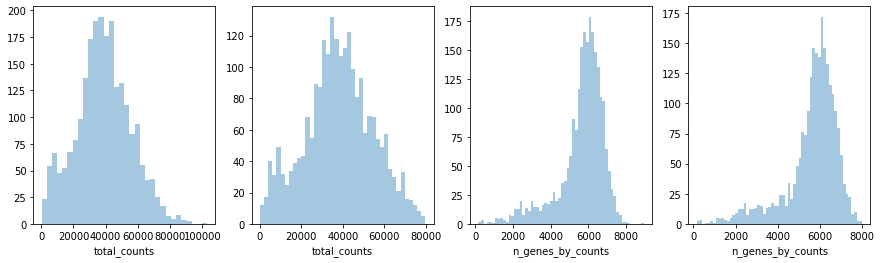

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 80000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 8000], kde=False, bins=60, ax=axs[3])

/opt/python/3.8/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


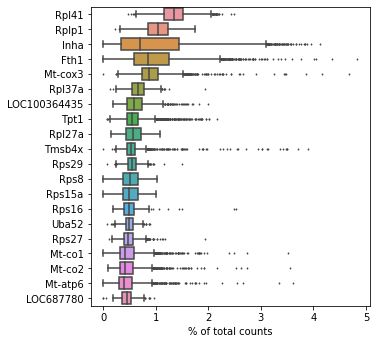

In [10]:
sc.pl.highest_expr_genes(adata, n_top=20)

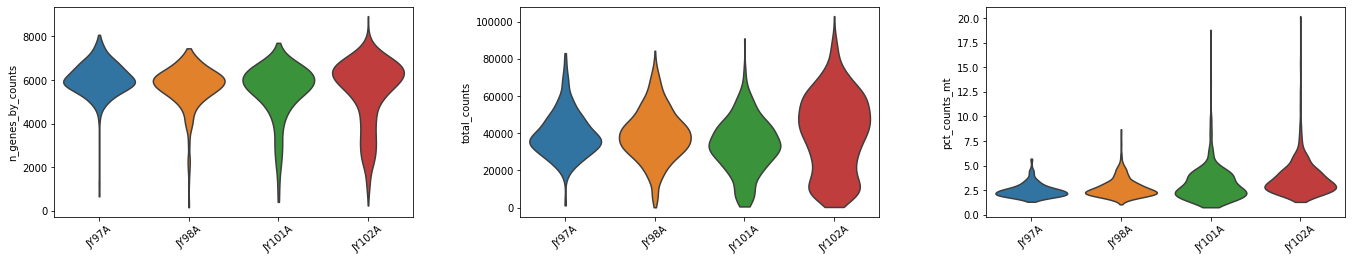

In [11]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], groupby='library_id',
             stripplot=False, multi_panel=True, rotation=40)

In [12]:
sc.pp.filter_cells(adata, min_genes=2000)
sc.pp.filter_cells(adata, max_genes=8000)
adata = adata[adata.obs["pct_counts_mt"] < 10]
print(f"#cells after MT filter: {adata.n_obs}")
sc.pp.filter_genes(adata, min_cells=2)
print(adata.var.shape)

#cells after MT filter: 2256
(16952, 8)


/opt/python/3.8/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


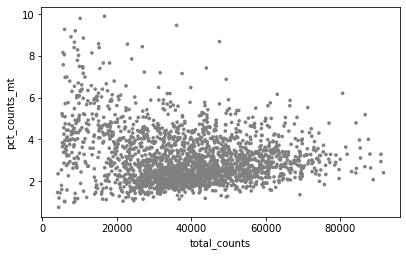

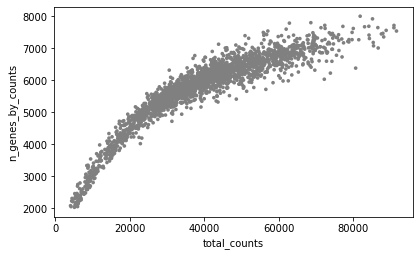

In [13]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

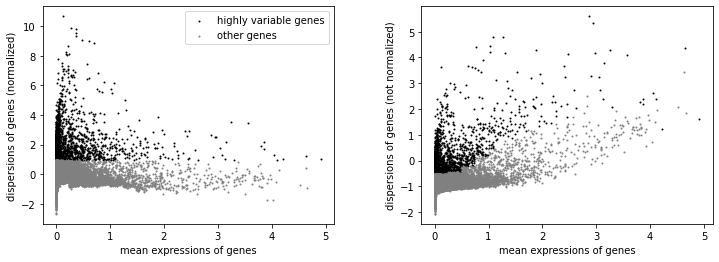

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
sc.pl.highly_variable_genes(adata)

In [15]:
adata.raw = adata
adata = adata[:, adata.var.highly_variable]

/opt/python/3.8/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


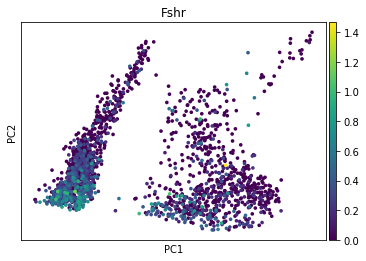

In [16]:
sc.pp.scale(adata, max_value=8)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata,color='Fshr')

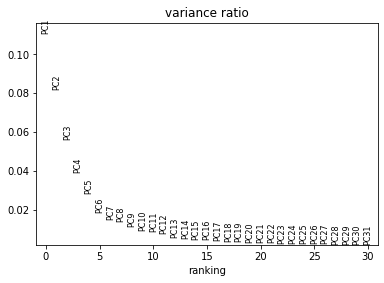

In [17]:
sc.pl.pca_variance_ratio(adata, log=False)

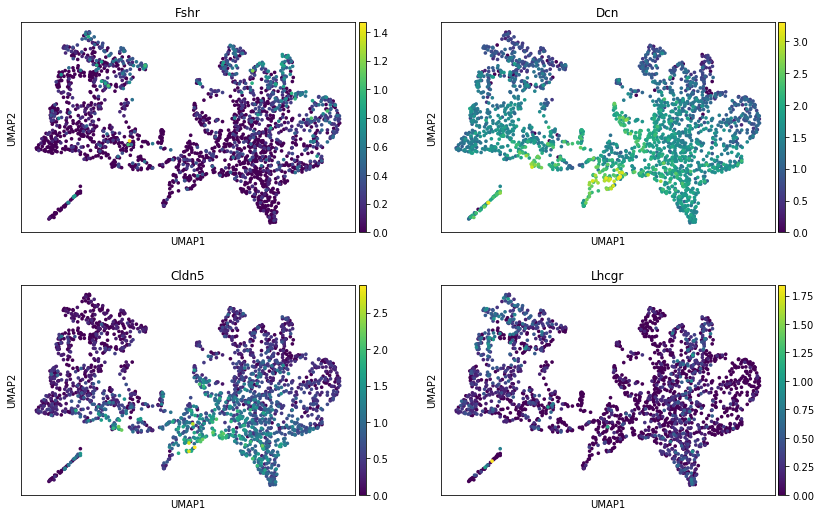

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata)
sc.pl.umap(adata,color=['Fshr','Dcn','Cldn5','Lhcgr'],ncols=2)

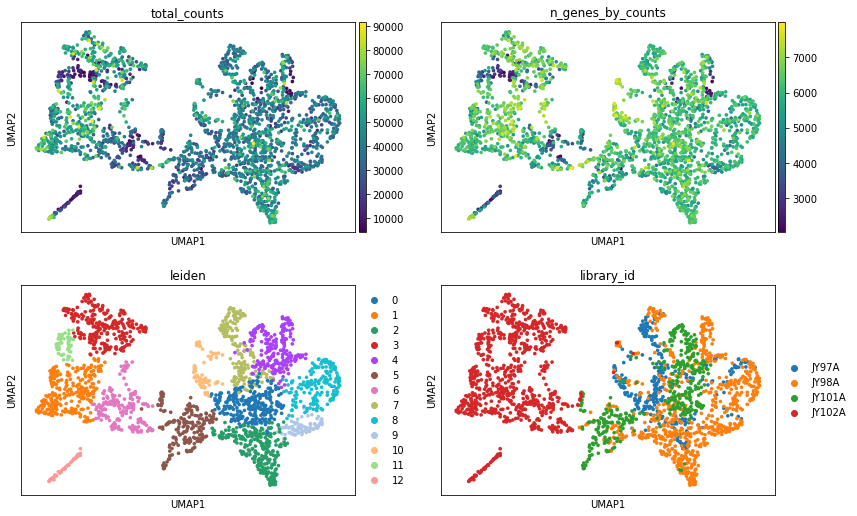

In [31]:
sc.tl.leiden(adata,resolution=.45)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden","library_id"], ncols=2)

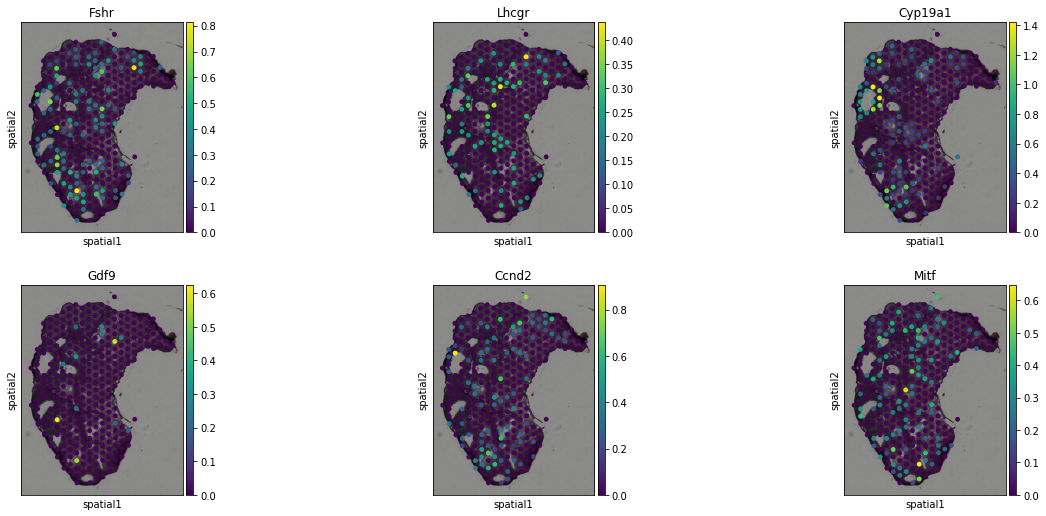

In [20]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY97A',:].copy(), color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Ccnd2','Mitf'], library_id='JY97A',ncols=3)

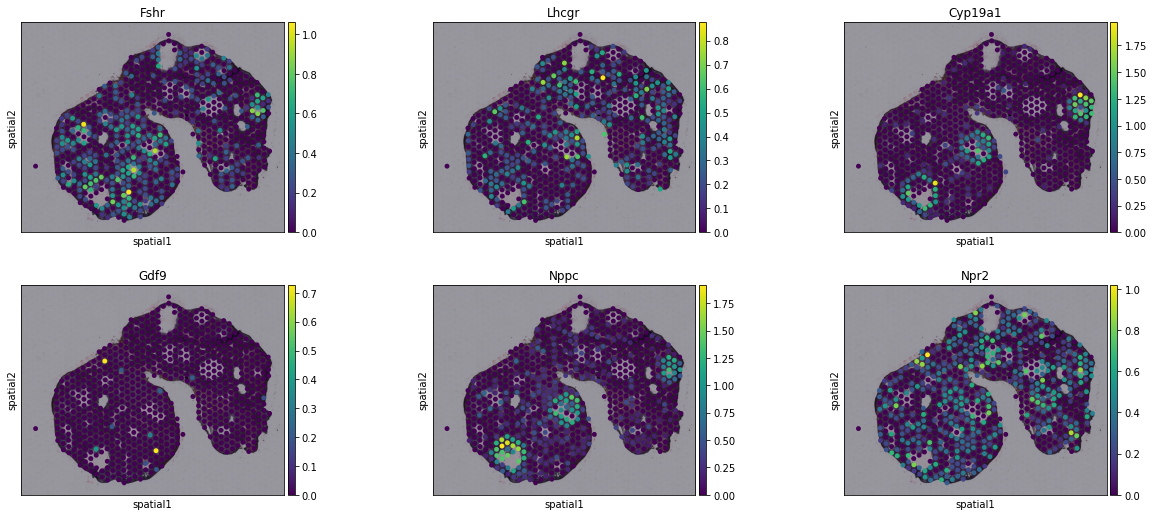

In [21]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY98A',:].copy(), 
              color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Nppc','Npr2'], library_id='JY98A',ncols=3,size=1.2)

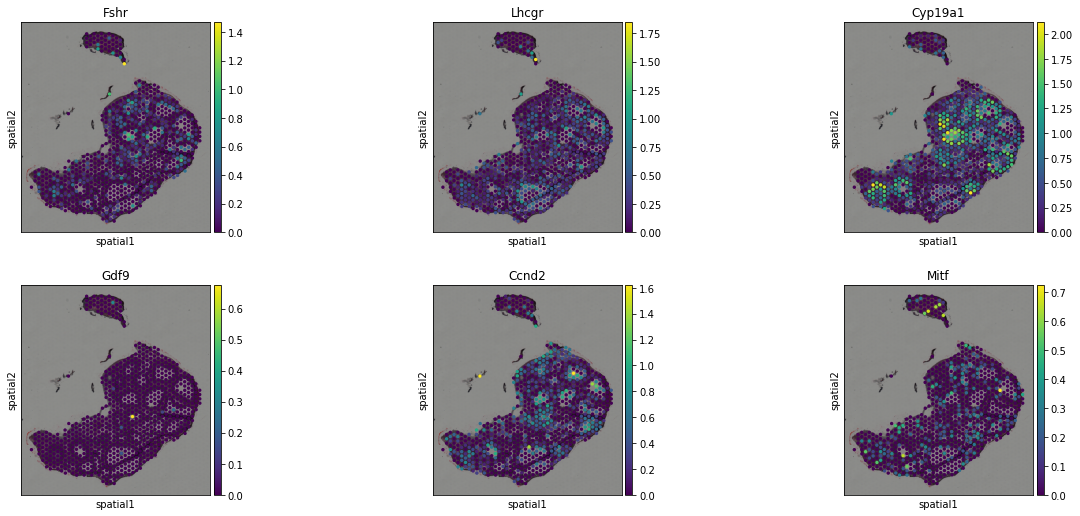

In [22]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY102A',:].copy(), 
              color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Ccnd2','Mitf'], library_id='JY102A',ncols=3,size=1.2)

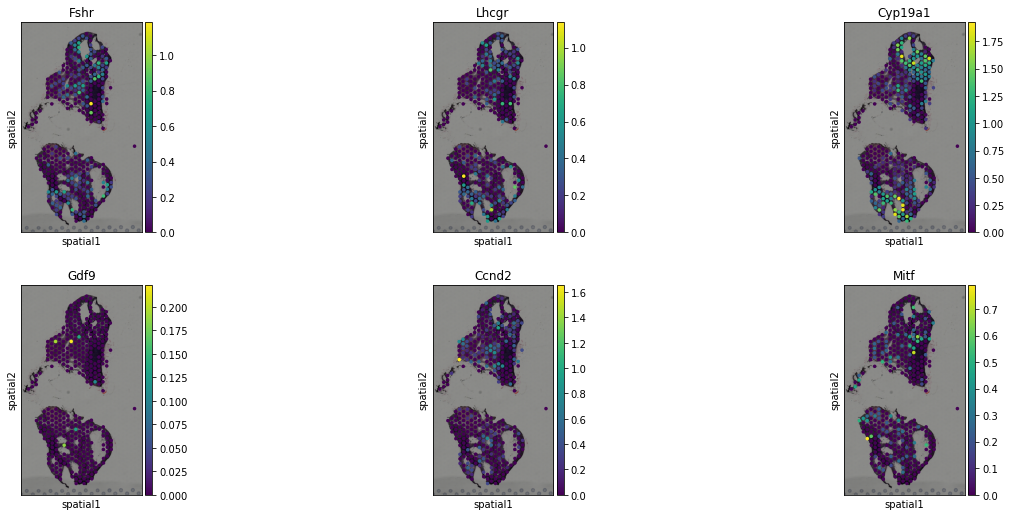

In [23]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY101A',:].copy(), 
              color=['Fshr','Lhcgr','Cyp19a1','Gdf9','Ccnd2','Mitf'], library_id='JY101A',ncols=3,size=1.2)

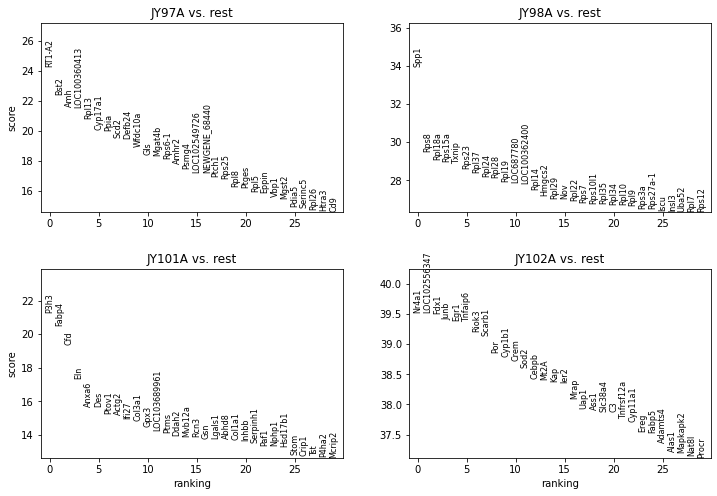

In [24]:
sc.tl.rank_genes_groups(adata,'library_id',method='wilcoxon',key_added='library')
sc.pl.rank_genes_groups(adata, key='library',n_genes=30, sharey=False, ncols=2)

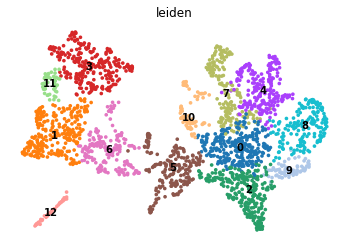

In [32]:
sc.pl.umap(adata, color="leiden", frameon=False, legend_loc='on data')

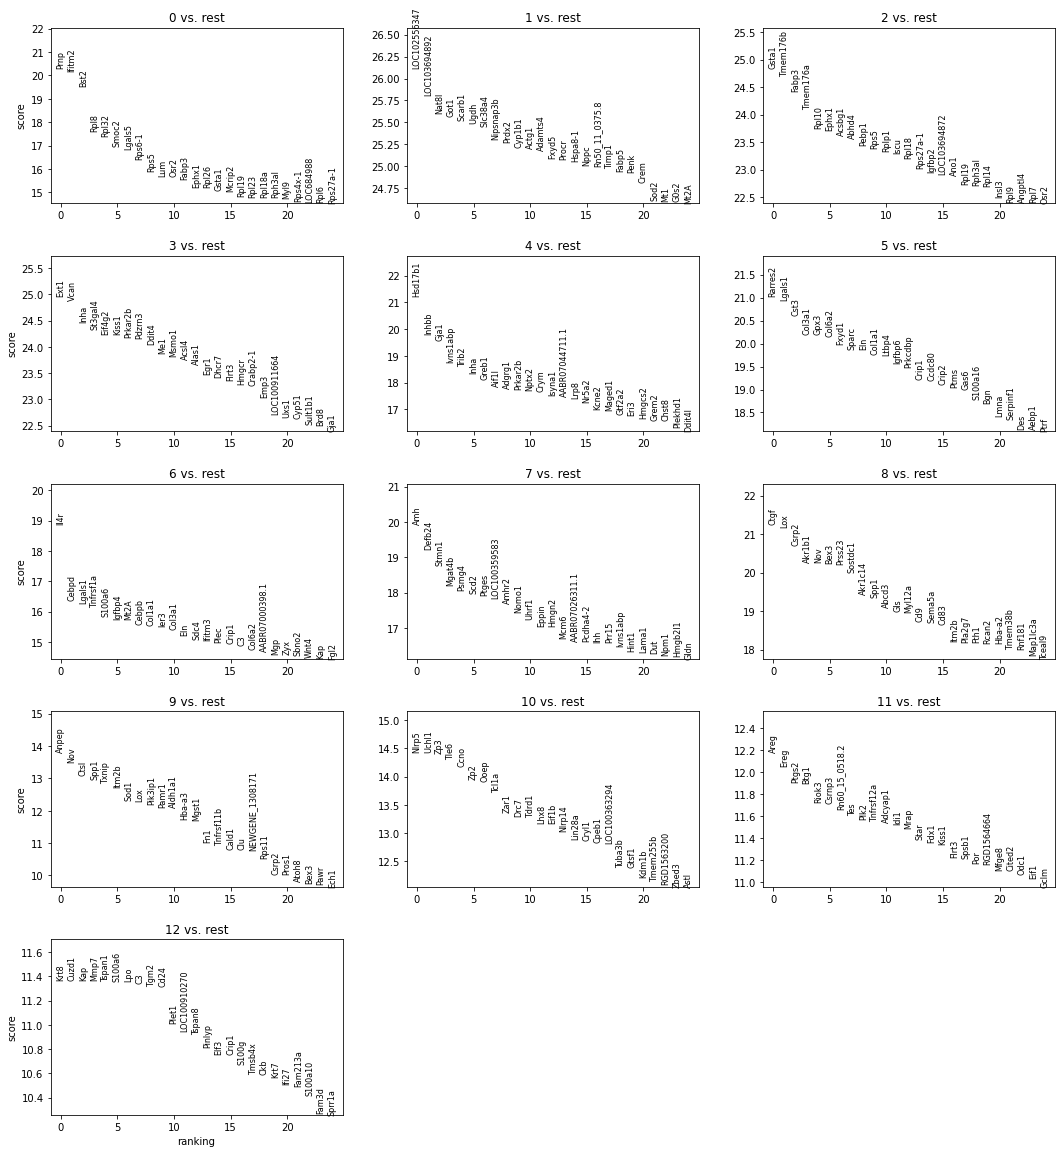

In [33]:
sc.tl.rank_genes_groups(adata,'leiden',method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, ncols=3)

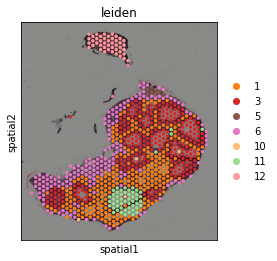

In [34]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY102A',:].copy(), 
              color='leiden', library_id='JY102A',ncols=2,size=1.2)

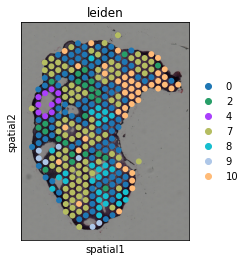

In [35]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY97A',:].copy(), 
              color='leiden', library_id='JY97A',ncols=2,size=1.2)

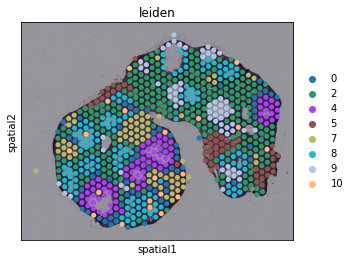

In [36]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY98A',:].copy(), 
              color='leiden', library_id='JY98A',ncols=2,size=1.2)

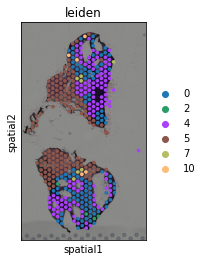

In [37]:
sc.pl.spatial(adata[adata.obs['library_id']=='JY101A',:].copy(), 
              color='leiden', library_id='JY101A',ncols=2,size=1.2)